In [1]:
# importing all necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the request csv file using pandas
urd = pd.read_csv("Uber Request Data.csv")
# viewing top 10 records to take a look at the data
urd.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
# making sure that number of duplicate rows are zero
urd.duplicated(subset=['Request id']).sum() == 0 

True

**It looks like the data does not have duplicate records**,
**let's look at the dimensions of the dataframe**

In [4]:
#getting know to know the numbers of rows and column using shape method
urd.shape

(6745, 6)

**check for NA values in dataset**

In [5]:
# Checking for NA/NONE/NULL using the isna() method.
# urd.shape's first element is number of records, so dividing it by no. of records to get empty values percentages.
urd.isna().sum()*100/urd.shape[0]

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [6]:
# Cross checking whether Driver ID is not available for statuses 'Trip Completed' and 'Cancelled'
urd[(urd['Driver id'].isna()) & (urd['Status'] != 'No Cars Available')]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


**From the above result, we know all the NA values in Driver ID fields are only due to Unavailabilty of car for that ride.
For the other two statuses Driver ID is available and NA in Driver field makes sense**

In [7]:
#Checking the total rides distribution across Status of the ride
urd.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

**From the above aggregation it is understood for each trip completed there is almost a trip which has no cars available.**

In [8]:
urd[(urd['Drop timestamp'].isna()) & (urd['Status'] == 'Trip Completed')]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


**It is observed that only Driver ID and Drop timestamp have empty/NA values.
The reason for NA values is either No cabs available or Driver Cancelled the ride**

In [9]:
# to check the datatypes of imported dataframe
urd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


**Time stamps are not in Datetime format and Driver ID is a whole number but imported as Float. These misrepresented datatypes need corrections**

In [10]:
# Conversion fields to its approriate data type 

urd['Drop timestamp'] = pd.to_datetime( urd['Drop timestamp'])
urd['Request timestamp'] = pd.to_datetime( urd['Request timestamp']) 
urd['Driver id'] = urd['Driver id'].astype(pd.Int32Dtype())

In [11]:
# Checking again the datatypes of dataframe
urd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   Int32         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: Int32(1), datetime64[ns](2), int64(1), object(2)
memory usage: 296.5+ KB


In [12]:
pd.to_datetime(urd['Request timestamp'].dt.date)

0      2016-11-07
1      2016-11-07
2      2016-12-07
3      2016-12-07
4      2016-07-13
          ...    
6740   2016-07-15
6741   2016-07-15
6742   2016-07-15
6743   2016-07-15
6744   2016-07-15
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [13]:
# extract hour from "Request timestamp"
urd['req_hr'] = urd['Request timestamp'].dt.hour.astype(pd.Int16Dtype())
# extract day from "Request timestamp"
urd['req_day'] = pd.to_datetime(urd['Request timestamp'].dt.date, format = "%Y-%m-%d")
# Checking the new columns in the dataframe
urd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   Int32         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   req_hr             6745 non-null   Int16         
 7   req_day            6745 non-null   datetime64[ns]
dtypes: Int16(1), Int32(1), datetime64[ns](3), int64(1), object(2)
memory usage: 369.0+ KB


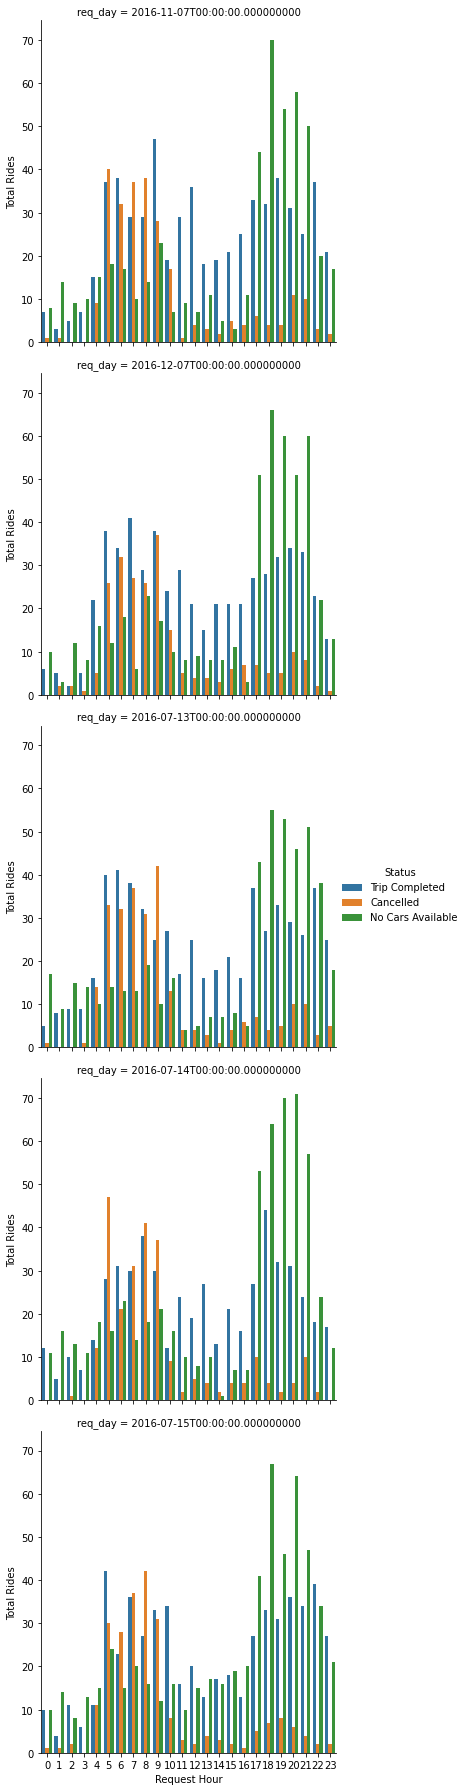

In [33]:
# category plot of hour and day w.r.t. status
plot = sns.catplot(x='req_hr',hue='Status', data = urd , kind = 'count', row = 'req_day' )
plot.set_xlabels('Request Hour')  # Change x axis label
plot.set_ylabels('Total Rides') # Change Y axis label

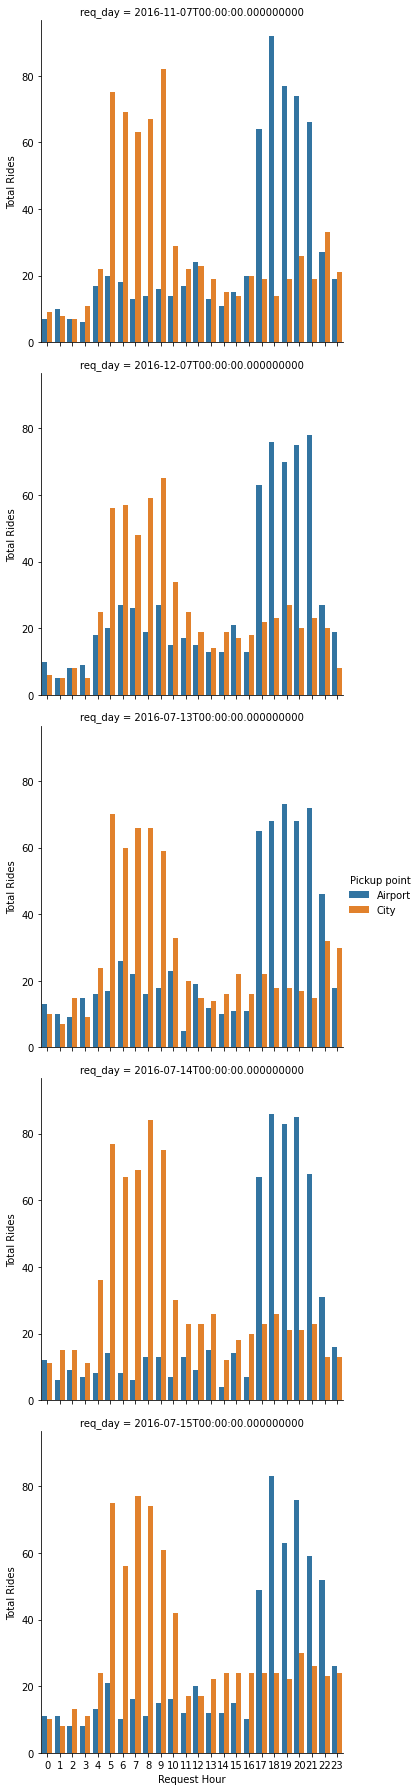

In [30]:
# category plot of hour and day w.r.t. pickup point
plot = sns.catplot(x='req_hr',hue='Pickup point', data = urd , kind = 'count', row = 'req_day')
# configure  X axis label, Y axis label
plot.set_xlabels('Request Hour')
plot.set_ylabels('Total Rides')

**Regardless of Date there is a pattern in Pickup point and Trip Status, so next we can proceed ignoring the date split to combine all of them**

Text(30.719765625000008, 0.5, 'Rides count')

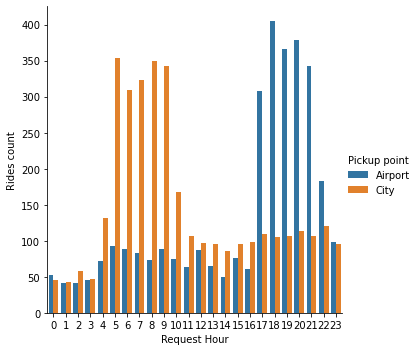

In [16]:
# aggregate count plot for all days w.r.t. to Pickup point
sns.factorplot(x='req_hr',hue='Pickup point', data = urd , kind = 'count')
# configure  X label, Y label
plt.xlabel('Request Hour')
plt.ylabel('Rides count')

In [17]:
# Checking for actual values across req. hour
urd.req_hr.value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: req_hr, dtype: Int64

In [18]:
# creating a time slot for various time period of day
def timeslot(x):
    '''
    In this function, the req time are not equally split into 4 buckets, due to business nature
    Morning Rush - 5AM upto 10 AM
    Office Hour - 10 AM upto 5 PM
    Evening Hour - 5 PM upto 11PM
    Late Night - 11 PM upto 5 AM
    '''
    if x >= 5 and x < 10: 
        return 'Morning Rush'
    elif x >= 10 and x < 17:
        return 'Office Hour'
    elif x >= 17 and x < 23:
        return 'Evening Rush'
    else:
        return 'Late Night'

urd['time_slot'] = urd['req_hr'].apply(timeslot)


In [19]:
# valuecount
urd.time_slot.value_counts(normalize=True)

Evening Rush    0.392291
Morning Rush    0.311787
Office Hour     0.181468
Late Night      0.114455
Name: time_slot, dtype: float64

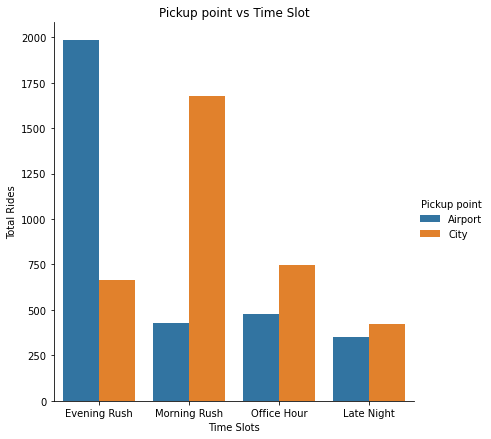

In [20]:
# another way to look at the trips made in each time slot
sns.factorplot(x='time_slot',hue='Pickup point', data = urd , kind = 'count', order = urd.time_slot.value_counts().index, size = 6)
# configure Title, X label, Y label
plt.title('Pickup point vs Time Slot')
plt.xlabel('Time Slots')
plt.ylabel('Total Rides')
plt.show()

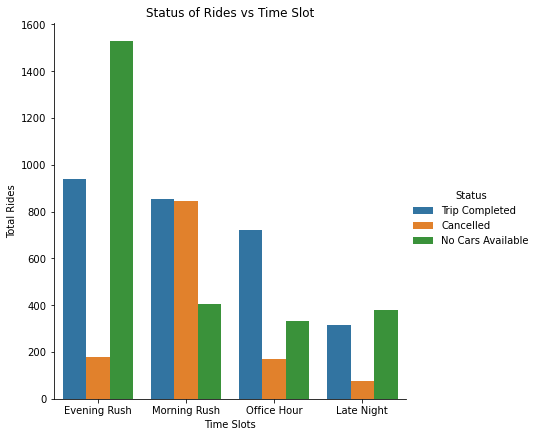

In [21]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.factorplot(x='time_slot',hue='Status', data = urd , kind = 'count', order = urd.time_slot.value_counts().index, size = 6)
# configure Title, X label, Y label
plt.title('Status of Rides vs Time Slot')
plt.xlabel('Time Slots')
plt.ylabel('Total Rides')
plt.show()

In [22]:
# We have problems during Morning Rush and Evening Rush, so creating subset of data based on time slot for effective analysis

urd_mr = urd[urd['time_slot'] == 'Morning Rush'].reset_index(drop = True)
urd_er = urd[urd['time_slot'] == 'Evening Rush'].reset_index(drop = True)

Text(0.5, 1.0, 'Ride count by Pickup point and Status')

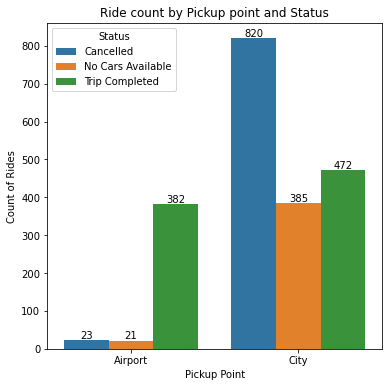

In [23]:
# Morning Rush df
grpd_urd_mr = urd_mr[['Status','Pickup point','time_slot']].groupby(['Pickup point','Status']).count().reset_index()

plt.figure(figsize=(6, 6))

plot = sns.barplot(data = grpd_urd_mr, x = 'Pickup point', hue = 'Status', y = 'time_slot' )
for container in plot.containers: # to populate data labels
    plot.bar_label(container)

plot.set_xlabel('Pickup Point')
plot.set_ylabel('Count of Rides')
plot.set_title('Ride count by Pickup point and Status')

Text(0.5, 1.0, 'Ride count by Pickup point and Status')

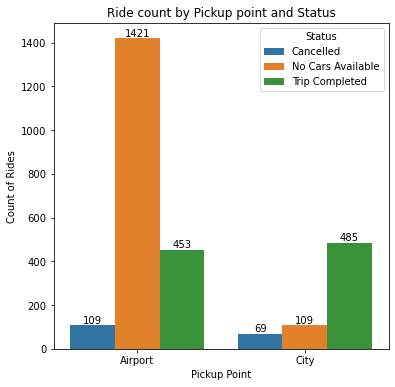

In [24]:

# Evening Rush df
grpd_urd_er = urd_er[['Status','Pickup point','time_slot']].groupby(['Pickup point','Status']).count().reset_index()

plt.figure(figsize=(6, 6))

plot = sns.barplot(data = grpd_urd_er, x = 'Pickup point', hue = 'Status', y = 'time_slot' )
for container in plot.containers: # to populate data labels
    plot.bar_label(container)

plot.set_xlabel('Pickup Point') # Configure X label
plot.set_ylabel('Count of Rides') # Configure y label
plot.set_title('Ride count by Pickup point and Status') # Configure Title

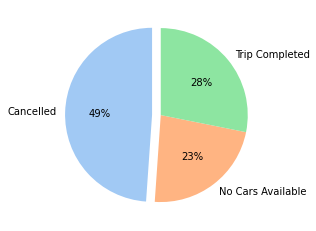

In [34]:
# Let's create pie charts instead of a count plots
urd_mr_city = grpd_urd_mr[grpd_urd_mr['Pickup point'] == 'City'].groupby('Status').sum().reset_index()
palette = sns.color_palette('pastel')[0:3] # configuring color for pie chart
pie = plt.pie(urd_mr_city['time_slot'], labels=urd_mr_city['Status'],startangle=90,explode=[0.1,0,0],colors = palette, autopct='%.0f%%')
#Start angle controls the starting position

plt.show()

**~50% of requests are declined by Drivers during Morning rush, recommendation - Incentives to Driver during morning Rush hours**

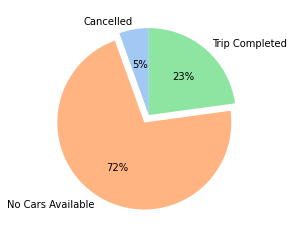

In [36]:
# Status of trips @ Evening Rush where pickup point is Airport
# Let's create pie charts instead of a count plots
urd_er_city = grpd_urd_er[grpd_urd_er['Pickup point'] == 'Airport'].groupby('Status').sum().reset_index()
palette = sns.color_palette('pastel')[0:3]  # configuring color for pie chart
pie = plt.pie(urd_er_city['time_slot'], labels=urd_er_city['Status'],startangle=90,explode=[0,0.1,0],colors = palette, autopct='%.0f%%')
#Start angle controls the starting position
plt.show()

**~70% of request does not have enough cabs during Evening Rush hours from Airport, recommendation - Encourage Ride sharing**